# Iran's Market with Ramin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
sakhooz_siman_df = pd.read_csv('Khoozestan.CE..csv')
sotran_maskan_df = pd.read_csv('Maskan.Invest..csv')


In [17]:
Date = []
sotran_vol = []
sakhooz_vol = []
sakhooz_close = []
sotran_close = []
list = np.zeros(len(sotran_maskan_df))
s=0
for i in range(len(sakhooz_siman_df)):
    for j in range(len(sotran_maskan_df)):
        if sakhooz_siman_df['<DTYYYYMMDD>'][i] == sotran_maskan_df['<DTYYYYMMDD>'][j] :
            list[j] = 1
            Date.append(sakhooz_siman_df['<DTYYYYMMDD>'][i])
            sotran_vol.append(sotran_maskan_df['<VOL>'][j])
            sakhooz_vol.append(sakhooz_siman_df['<VOL>'][i])
            sotran_close.append(sotran_maskan_df['<CLOSE>'][j])
            sakhooz_close.append(sakhooz_siman_df['<CLOSE>'][i])

In [23]:
same_date = pd.DataFrame({'Date':Date,'sakhooz_vol':sakhooz_vol,'sotran_vol':sotran_vol,'sakhooz_close':sakhooz_close,'sotran_close':sotran_close})

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from my_packs import coupled_markets as cm

sakhooz_ret = cm.price_return(same_date['sakhooz_close'])
sotran_ret = cm.price_return(same_date['sotran_close'])

pdf = cm.joint_pdf(sakhooz_ret,sotran_ret,0.001,0.001)
kerd = cm.kernel_2d(pdf['pdf'],3,3)
lat_pot = cm.quantum_potential(pdf['pdf'],0.3166639414822088)
linebazi = cm.linebazi(lat_pot['Q_tot'])

Text(0, 0.5, 'sakhooz')

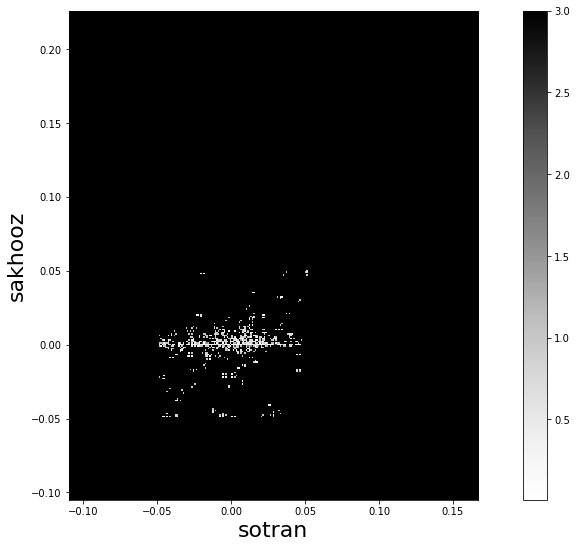

In [50]:
fig = plt.figure(figsize=(16,9))


plt.imshow(abs(linebazi), cmap='Greys' ,origin = 'lower',extent=[pdf['y_values'][0],pdf['y_values'][-1],pdf['x_values'][0],pdf['x_values'][-1]])
plt.colorbar()
plt.xlabel('sotran',fontsize=22)
plt.ylabel('sakhooz',fontsize=22)

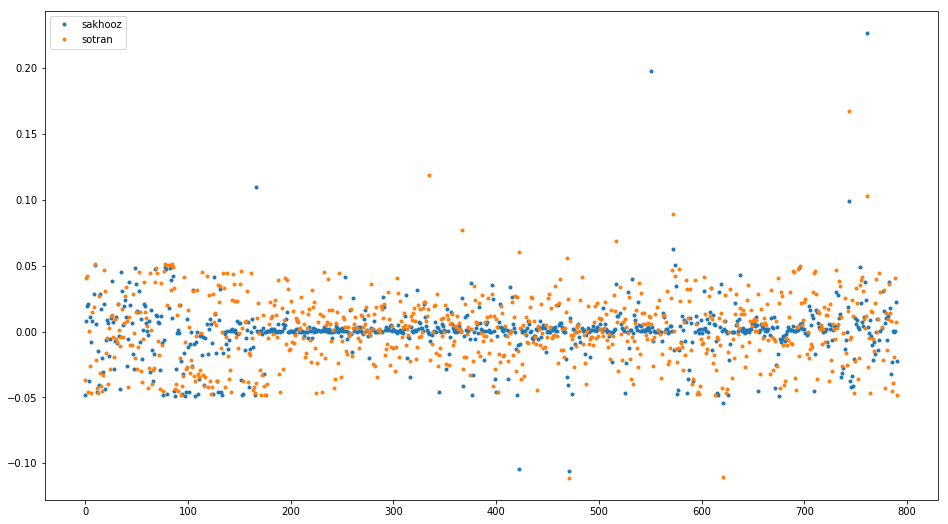

In [38]:
fig = plt.figure(figsize=(16,9))
plt.plot(sakhooz_ret,'.',label='sakhooz')
plt.plot(sotran_ret,'.',label='sotran')
plt.legend()

# MASS

In [11]:
shares_out1 = 650000000
vol1 = sakhooz_siman_df['<VOL>']
vol1_mean = np.mean(vol1)


shares_out2 = 1200000000
vol2 = sotran_maskan_df['<VOL>']
vol2_mean = np.mean(vol2)


In [12]:
mass1 = vol1_mean/shares_out1
mass2 = vol2_mean/shares_out2

In [13]:
mass1

0.0009545945295251446

In [14]:
mass2

0.0030145349832285113

In [15]:
mass1/mass2

0.3166639414822088